Mini-Project : Data Analysis for Marketing Strategy


Introduction

In this mini-project, we will perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.


👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to load and preprocess a dataset.
    Techniques for area analysis to identify key markets.
    Methods for customer analysis to determine high-value customers.
    Strategies for product category analysis to identify top-performing products.
    How to analyze sales and profit trends over time.
    Application of the Pareto Principle to prioritize key drivers of sales and profit.


Dataset

The US Superstore Dataset contains the following attributes:

    Row ID: Unique ID for each row.
    Order ID: Unique Order ID for each Customer.
    Order Date: Order Date of the product.
    Ship Date: Shipping Date of the Product.
    Ship Mode: Shipping Mode specified by the Customer.
    Customer ID: Unique ID to identify each Customer.
    Customer Name: Name of the Customer.
    Segment: The segment where the Customer belongs.
    Country: Country of residence of the Customer.
    City: City of residence of the Customer.
    State: State of residence of the Customer.
    Postal Code: Postal Code of every Customer.
    Region: Region where the Customer belongs.
    Product ID: Unique ID of the Product.
    Category: Category of the product ordered.
    Sub-Category: Sub-Category of the product ordered.
    Product Name: Name of the Product.
    Sales: Sales of the Product.
    Quantity: Quantity of the Product.
    Discount: Discount provided.
    Profit: Profit/Loss incurred.


Task

First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

    Which states have the most sales?
    What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
    Who is an outstanding customer in New York?
    Are there any differences among states in profitability?
    The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
    What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
    What are the Top 20 customers by Sales?
    Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
    Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from faker import Faker
from faker_commerce import Provider
import random
import calendar
import matplotlib.colors as mcolors
import pandas as pd
from ipywidgets import interact, widgets
from IPython.display import display
from skimpy import skim


In [4]:
df = pd.read_excel('US Superstore data.xls')
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [10]:
print(df.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [11]:
print(df.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [21]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9994   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ datetime64  │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Row ID         │   0 │      0 │     4998 │     2885 │      1 │   2499 │   4998 │   7496 │   9994 │ ▇▇▇▇▇▇  │  │
│ │ Postal Code    │   0 │      0 │    55190 │    32060 │   1040 │  23220 │  56430 │  90010 │  99300 │ ▅▅▃▂▃▇  │  │
│ │ Sales          │   0 │      0 │    229.9 │    623.2 │  0.444 │  17.28 │  54.49 │  209.9 │  22640 │    ▇    │  │
│ │ Quantity       │   0 │      0 │     3.79 │    2.225 │      1 │      2 │      3 │      5 │     14 │  ▇▃▂▁   │  │
│ │ Discount       │   0 │      0 │   0.1562 │   0.2065 │      0 │      0 │    0.2 │    0.2 │    0.8 │ ▇▆   ▁  │  │
│ │ Profit         │   0 │      0 │    28.66 │    234.3 │  -6600 │  1.729 │  8.666 │  29.36 │   8400 │     ▇   │  │
│ └────────────────┴─────┴────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column               ┃ NA     ┃ NA %      ┃ first                ┃ last                ┃ frequency         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order Date           │      0 │         0 │      2014-01-03      │     2017-12-30      │ None              │  │
│ │ Ship Date            │      0 │         0 │      2014-01-07      │     2018-01-05      │ None              │  │
│ └──────────────────────┴────────┴───────────┴──────────────────────┴─────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Order ID  │  0 │    0 │ CA-2016-1 │ CA-2016-1 │ CA-2014-1 │ US-2017-1 │        14 │         1 │       9994 │  │
│ │           │    │      │ 52156     │ 52156     │ 0000

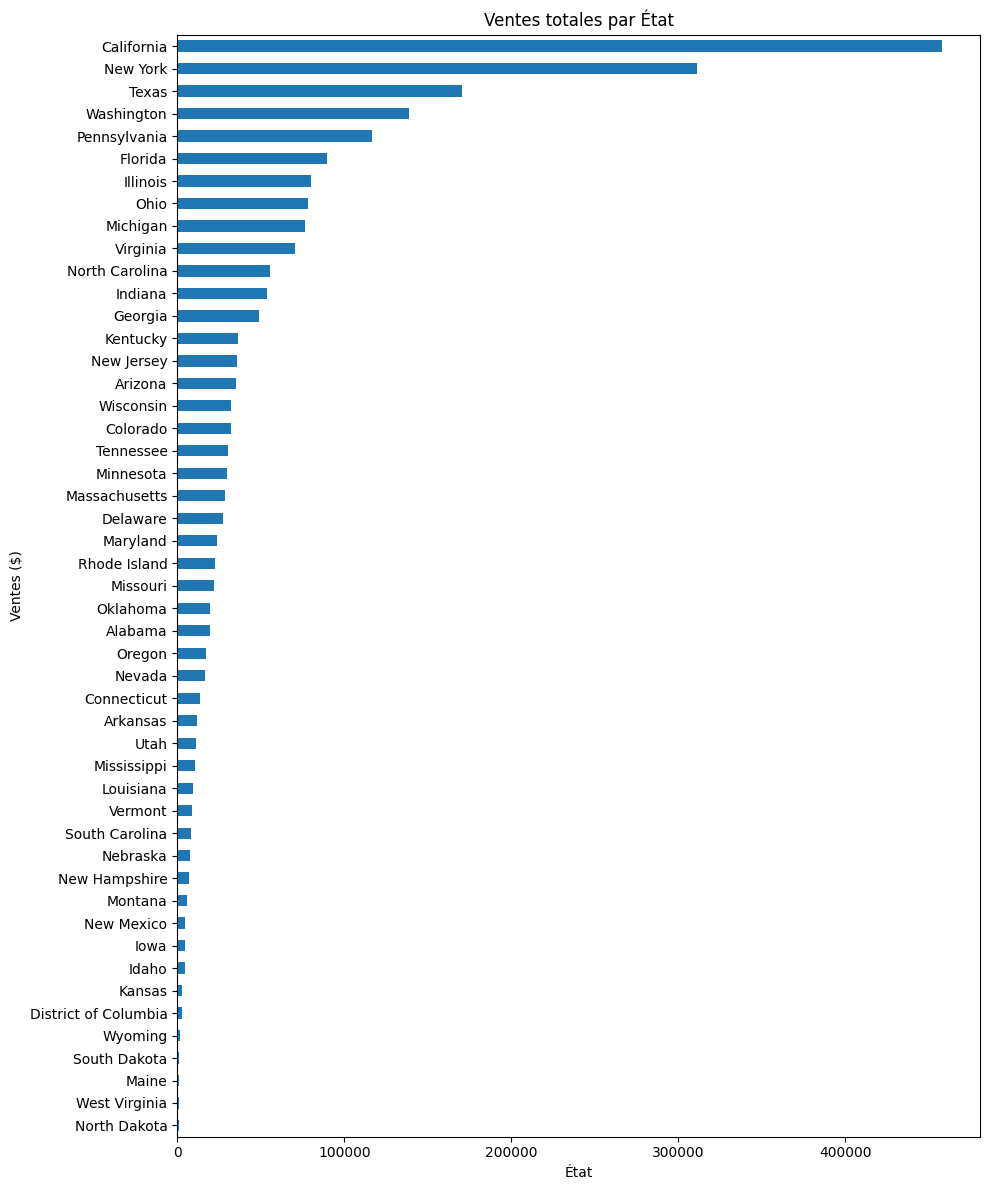

In [27]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
state_sales.plot(kind='barh', figsize=(10, 12))
plt.title('Ventes totales par État')
plt.xlabel('État')
plt.ylabel('Ventes ($)')
plt.tight_layout()
plt.show()

In [8]:
df_ny_ca = df[df['State'].isin(['New York', 'California'])]
ny_ca_summary = df_ny_ca.groupby('State')[['Sales', 'Profit']].sum()
print(ny_ca_summary)

                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


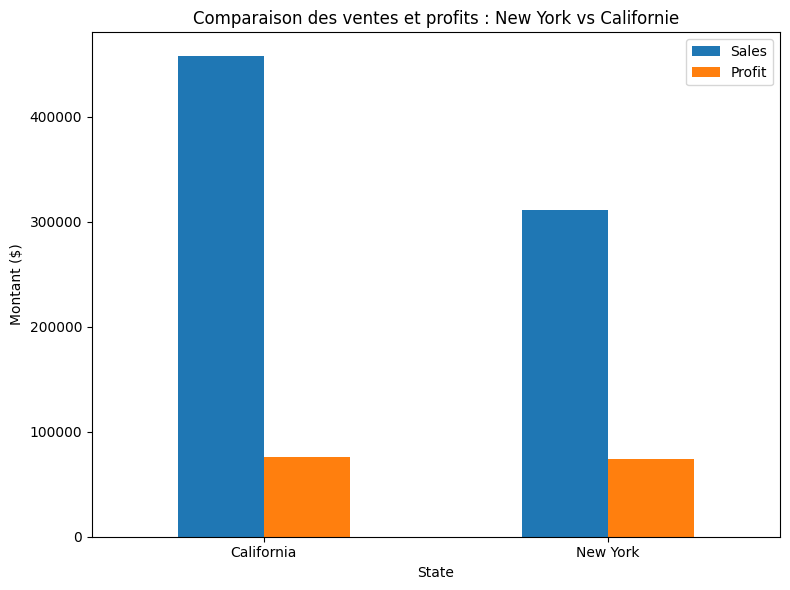

In [9]:
ny_ca_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Comparaison des ventes et profits : New York vs Californie')
plt.ylabel('Montant ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

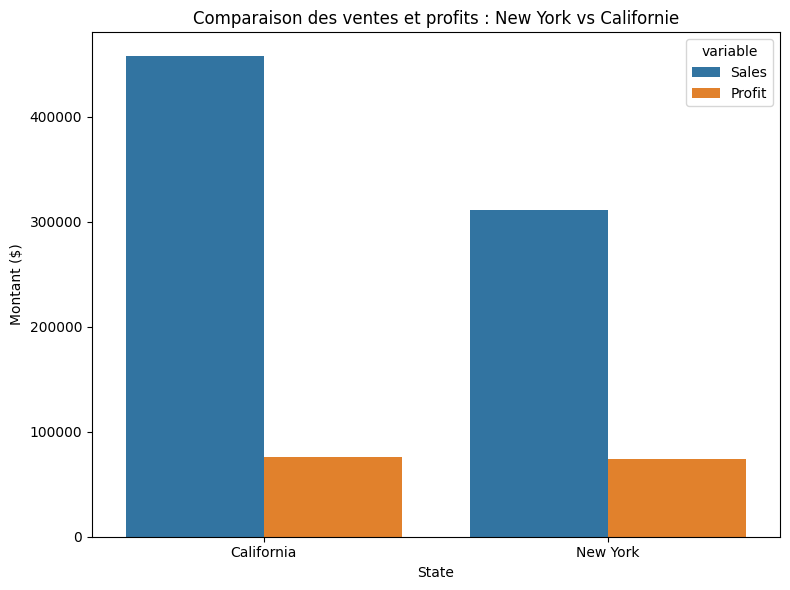

In [10]:
ny_ca_summary.reset_index(inplace=True)
ny_ca_melted = ny_ca_summary.melt(id_vars='State', value_vars=['Sales', 'Profit'])

plt.figure(figsize=(8, 6))
sns.barplot(data=ny_ca_melted, x='State', y='value', hue='variable')
plt.title('Comparaison des ventes et profits : New York vs Californie')
plt.ylabel('Montant ($)')
plt.tight_layout()
plt.show()

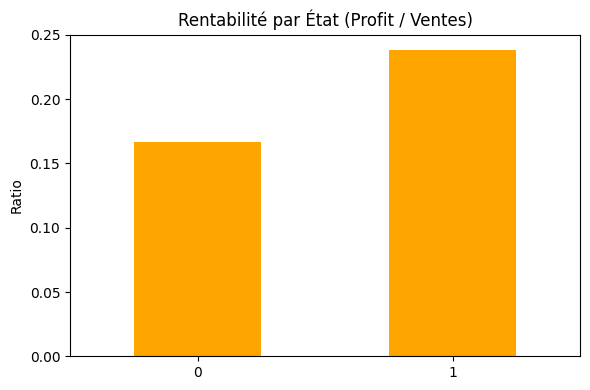

In [11]:
ny_ca_summary['Profitability'] = ny_ca_summary['Profit'] / ny_ca_summary['Sales']
ny_ca_summary['Profitability'].plot(kind='bar', figsize=(6, 4), color='orange')
plt.title('Rentabilité par État (Profit / Ventes)')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

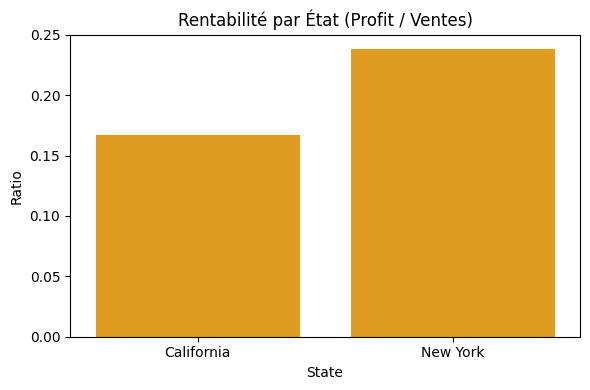

In [12]:
ny_ca_profit = ny_ca_summary.reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=ny_ca_profit, x='State', y='Profitability', color='orange')
plt.title('Rentabilité par État (Profit / Ventes)')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()

Hors sujet mais New york semble faire presque autant de profit que la californie pour 25% de ventes en moins. J'aimerais creuser les raions.

remise moyenne californie: 0.07276361819090454
remise moyenne new york: 0.055319148936170216


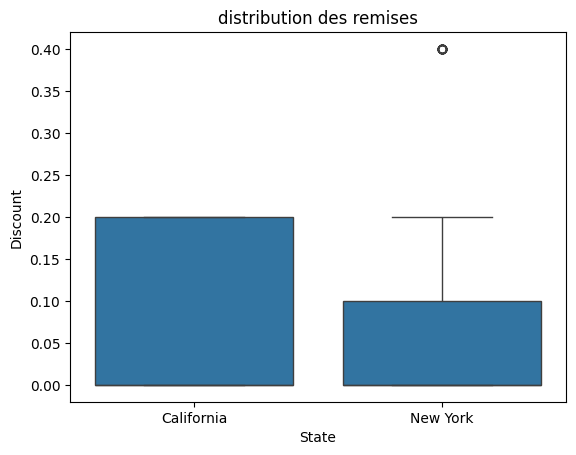

In [14]:
# verifier si la californie fait plus de remises que new york
df_ny = df[df['State'] == 'New York']
df_ca = df[df['State'] == 'California']
print('remise moyenne californie:', df_ca['Discount'].mean())
print('remise moyenne new york:', df_ny['Discount'].mean())

# visualiser les remises par etat
sns.boxplot(data=df[df['State'].isin(['New York', 'California'])], x='State', y='Discount')
plt.title('distribution des remises')
plt.show()

In [16]:
# voir la proportion des categories vendues
print('ventes par categorie - californie:')
print(df_ca['Category'].value_counts(normalize=True))

print('ventes par categorie - new york:')
print(df_ny['Category'].value_counts(normalize=True))

# voir le profit total par categorie
print('profits par categorie - californie:')
print(df_ca.groupby('Category')['Profit'].sum())

print('profits par categorie - new york:')
print(df_ny.groupby('Category')['Profit'].sum())

ventes par categorie - californie:
Category
Office Supplies    0.598701
Furniture          0.221889
Technology         0.179410
Name: proportion, dtype: float64
ventes par categorie - new york:
Category
Office Supplies    0.606383
Furniture          0.209220
Technology         0.184397
Name: proportion, dtype: float64
profits par categorie - californie:
Category
Furniture           9162.9656
Office Supplies    37748.3847
Technology         29470.0368
Name: Profit, dtype: float64
profits par categorie - new york:
Category
Furniture           5857.6801
Office Supplies    25994.0829
Technology         42186.7856
Name: Profit, dtype: float64


In [18]:
# ajouter la colonne delivery time dans df principal
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# redefinir les sous-ensembles pour inclure cette colonne
df_ca = df[df['State'] == 'California']
df_ny = df[df['State'] == 'New York']

# comparer les delais moyens
print('delai moyen californie:', df_ca['Delivery Time'].mean())
print('delai moyen new york:', df_ny['Delivery Time'].mean())

# comparer les modes de livraison
print('mode de livraison - californie:')
print(df_ca['Ship Mode'].value_counts(normalize=True))

print('mode de livraison - new york:')
print(df_ny['Ship Mode'].value_counts(normalize=True))

delai moyen californie: 3.867066466766617
delai moyen new york: 4.057624113475177
mode de livraison - californie:
Ship Mode
Standard Class    0.582209
Second Class      0.197401
First Class       0.160920
Same Day          0.059470
Name: proportion, dtype: float64
mode de livraison - new york:
Ship Mode
Standard Class    0.601064
Second Class      0.185284
First Class       0.158688
Same Day          0.054965
Name: proportion, dtype: float64


In [19]:
# nombre de clients uniques
print('clients uniques - californie:', df_ca['Customer ID'].nunique())
print('clients uniques - new york:', df_ny['Customer ID'].nunique())

# profit moyen par client
print('profit moyen par client - californie:',
      df_ca.groupby('Customer ID')['Profit'].mean().mean())

print('profit moyen par client - new york:',
      df_ny.groupby('Customer ID')['Profit'].mean().mean())

clients uniques - californie: 577
clients uniques - new york: 415
profit moyen par client - californie: 36.76710075798311
profit moyen par client - new york: 64.1091243032055


Donc !!

NY est plus rentable car :

    fait moins de remises.

    vend proportionnellement plus de tech, qui est la catégorie la plus rentable.

    a moins de clients, mais chaque client rapporte presque 2x plus.

Les délais et les modes de livraison :

    similaires

In [27]:
df_ny = df[df['State'] == 'New York']
client_profit_ny = df_ny.groupby('Customer Name')[['Sales', 'Profit']].sum()
client_profit_ny_sorted = client_profit_ny.sort_values(by='Profit', ascending=False)
print(client_profit_ny_sorted.head(10))

                      Sales     Profit
Customer Name                         
Tom Ashbrook      13723.498  4599.2073
Keith Dawkins      5854.194  2510.8903
Karen Daniels      6241.282  2283.0463
Nathan Mautz       4821.292  2247.1904
Tom Boeckenhauer   6999.960  2239.9872
Steven Roelle      3904.680  1863.9614
Pete Kriz          4816.690  1695.3209
Darrin Martin      4283.792  1599.6806
Todd Sumrall       6492.314  1574.9714
Seth Vernon        7359.918  1571.7964


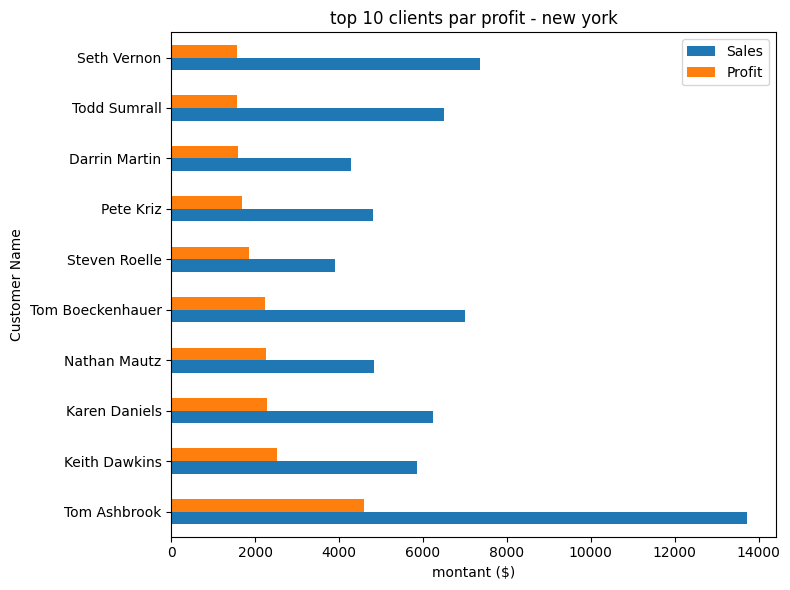

In [28]:
client_profit_ny_sorted.head(10).plot(kind='barh', figsize=(8, 6))
plt.title('top 10 clients par profit - new york')
plt.xlabel('montant ($)')
plt.tight_layout()
plt.show()

In [29]:
client_profit_ny_sorted['Profitability'] = client_profit_ny_sorted['Profit'] / client_profit_ny_sorted['Sales']
print(client_profit_ny_sorted.sort_values(by='Profitability', ascending=False).head(10))

                   Sales   Profit  Profitability
Customer Name                                   
Penelope Sewall    16.98   8.4900           0.50
Toby Carlisle      59.20  29.6000           0.50
Lori Olson         47.98  23.9900           0.50
Linda Cazamias      8.40   4.2000           0.50
Russell Applegate  48.94  24.4700           0.50
Rick Reed          36.48  18.2400           0.50
Dave Kipp          74.95  36.7255           0.49
Allen Goldenen     14.40   7.0560           0.49
Michael Chen        6.03   2.9547           0.49
Aaron Smayling     65.78  32.2322           0.49


In [31]:
state_summary = df.groupby('State')[['Sales', 'Profit']].sum()
state_summary['Rentabilite'] = state_summary['Profit'] / state_summary['Sales']
state_rentabilite_sorted = state_summary.sort_values(by='Rentabilite', ascending=False)
print(state_rentabilite_sorted.head(10))
print(state_rentabilite_sorted.tail(10))

                          Sales      Profit  Rentabilite
State                                                   
District of Columbia   2865.020   1059.5893     0.369837
Delaware              27451.069   9977.3748     0.363460
Minnesota             29863.150  10823.1874     0.362426
Maine                  1270.530    454.4862     0.357714
Arkansas              11678.130   4008.6871     0.343264
Indiana               53555.360  18382.9363     0.343251
Georgia               49095.840  16250.0433     0.330986
Montana                5589.352   1833.3285     0.328004
Rhode Island          22627.956   7285.6293     0.321975
Michigan              76269.614  24463.1876     0.320746
                      Sales      Profit  Rentabilite
State                                               
Florida          89473.7080  -3399.3017    -0.037992
Oregon           17431.1500  -1190.4705    -0.068296
Arizona          35282.0010  -3427.9246    -0.097158
Pennsylvania    116511.9140 -15559.9603    -0.13354

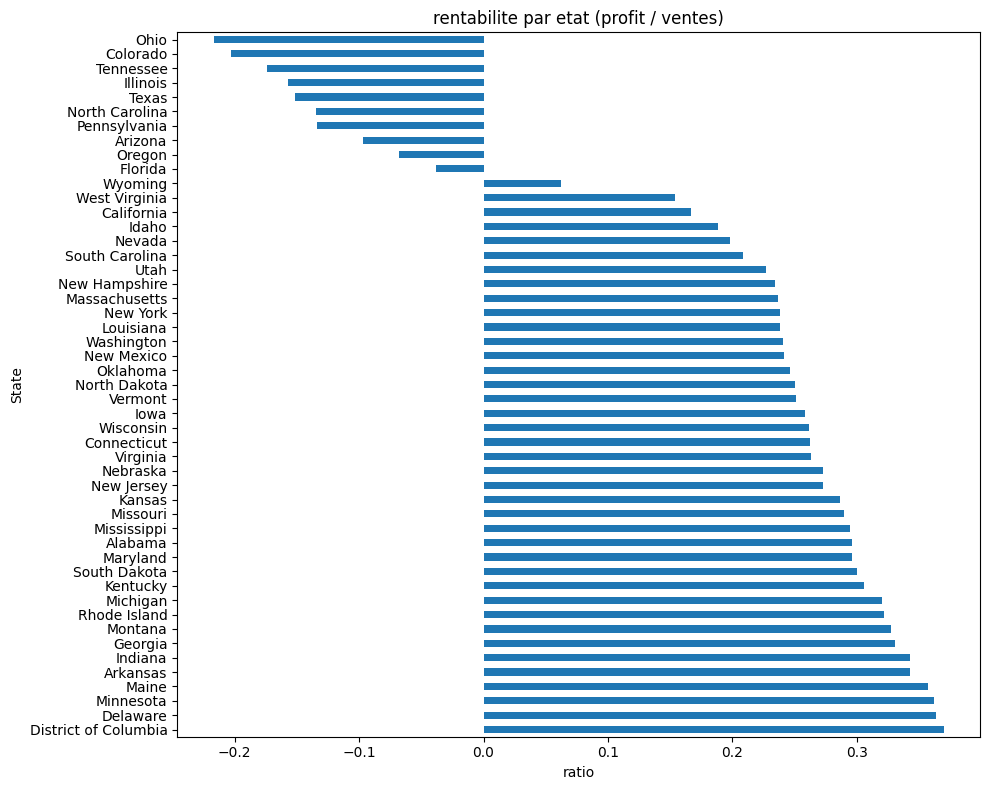

In [32]:
plt.figure(figsize=(10, 8))
state_rentabilite_sorted['Rentabilite'].plot(kind='barh')
plt.title('rentabilite par etat (profit / ventes)')
plt.xlabel('ratio')
plt.tight_layout()
plt.show()

Les États en haut :

    très rentables (faibles remises, produits à haute marge, clients fidèles)

Les États en bas :

    peuvent être déficitaires (beaucoup de remises, produits à faible marge)

croisonsça avec leur niveau de remise moyen pour voir

In [33]:
discount_by_state = df.groupby('State')['Discount'].mean()
state_summary = df.groupby('State')[['Sales', 'Profit']].sum()
state_summary['Rentabilite'] = state_summary['Profit'] / state_summary['Sales']
state_summary['Remise Moyenne'] = discount_by_state
print(state_summary.sort_values(by='Rentabilite', ascending=False).head(10))
print(state_summary.sort_values(by='Rentabilite').head(10))

                          Sales      Profit  Rentabilite  Remise Moyenne
State                                                                   
District of Columbia   2865.020   1059.5893     0.369837        0.000000
Delaware              27451.069   9977.3748     0.363460        0.006250
Minnesota             29863.150  10823.1874     0.362426        0.000000
Maine                  1270.530    454.4862     0.357714        0.000000
Arkansas              11678.130   4008.6871     0.343264        0.000000
Indiana               53555.360  18382.9363     0.343251        0.000000
Georgia               49095.840  16250.0433     0.330986        0.000000
Montana                5589.352   1833.3285     0.328004        0.066667
Rhode Island          22627.956   7285.6293     0.321975        0.021429
Michigan              76269.614  24463.1876     0.320746        0.007059
                      Sales      Profit  Rentabilite  Remise Moyenne
State                                                  

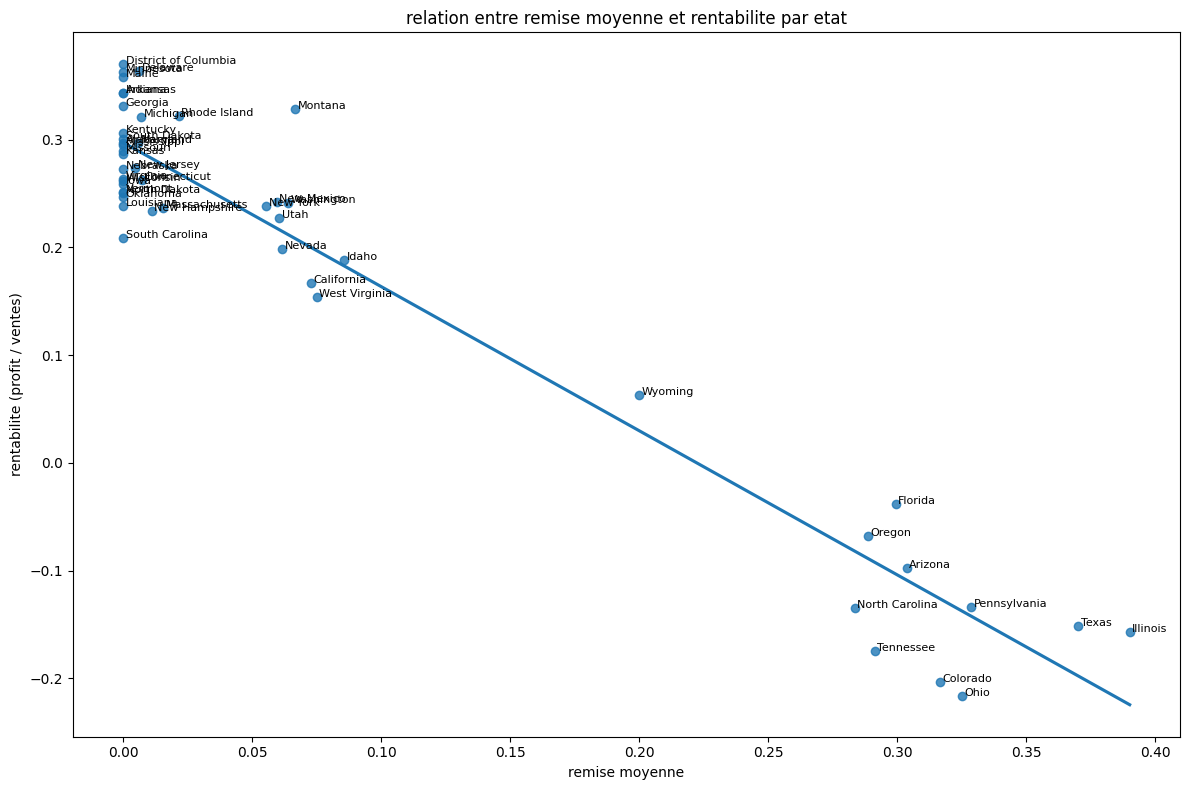

In [37]:
# preparation
data = state_summary.reset_index()

# scatterplot avec droite
plt.figure(figsize=(12, 8))
sns.regplot(data=data, x='Remise Moyenne', y='Rentabilite', ci=None)

# ajouter les noms des etats
for i in range(len(data)):
    x = data.loc[i, 'Remise Moyenne']
    y = data.loc[i, 'Rentabilite']
    plt.text(x + 0.001, y, data.loc[i, 'State'], fontsize=8)

plt.title('relation entre remise moyenne et rentabilite par etat')
plt.xlabel('remise moyenne')
plt.ylabel('rentabilite (profit / ventes)')
plt.tight_layout()
plt.show()

Si je comprends bien. Plus un etat accorde des remises, moins il est rentable.

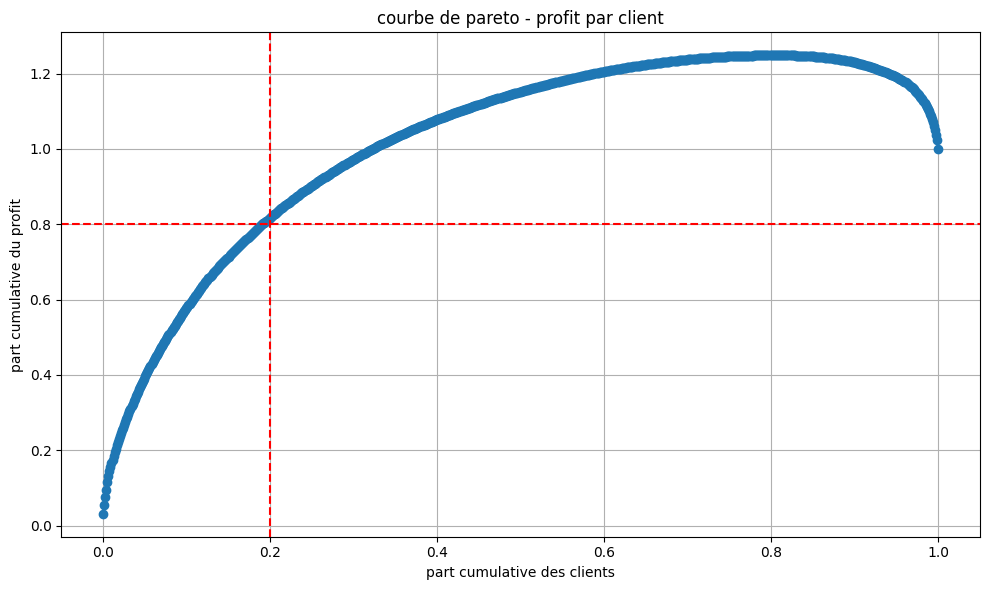

In [38]:
client_profit = df.groupby('Customer Name')['Profit'].sum()
client_profit_sorted = client_profit.sort_values(ascending=False)
total_profit = client_profit_sorted.sum()
profit_cumsum = client_profit_sorted.cumsum()
profit_cum_percent = profit_cumsum / total_profit
pareto_df = pd.DataFrame({
    'Profit': client_profit_sorted,
    'Profit Cumulé (%)': profit_cum_percent
})
pareto_df['Client (%)'] = np.linspace(0, 1, len(pareto_df))
plt.figure(figsize=(10, 6))
plt.plot(pareto_df['Client (%)'], pareto_df['Profit Cumulé (%)'], marker='o')
plt.axhline(0.8, color='red', linestyle='--')
plt.axvline(0.2, color='red', linestyle='--')
plt.title('courbe de pareto - profit par client')
plt.xlabel('part cumulative des clients')
plt.ylabel('part cumulative du profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# meme code + barres
plt.figure(figsize=(12, 6))
# barres = valeur brute
plt.bar(pareto_df.index[:20], pareto_df['Profit'][:20], color='skyblue')
# ligne = cumul
plt.plot(pareto_df.index[:20], pareto_df['Profit Cumulé (%)'][:20], color='red', marker='o')
plt.axhline(0.8, color='green', linestyle='--')
plt.title("courbe de pareto - top 20 clients")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

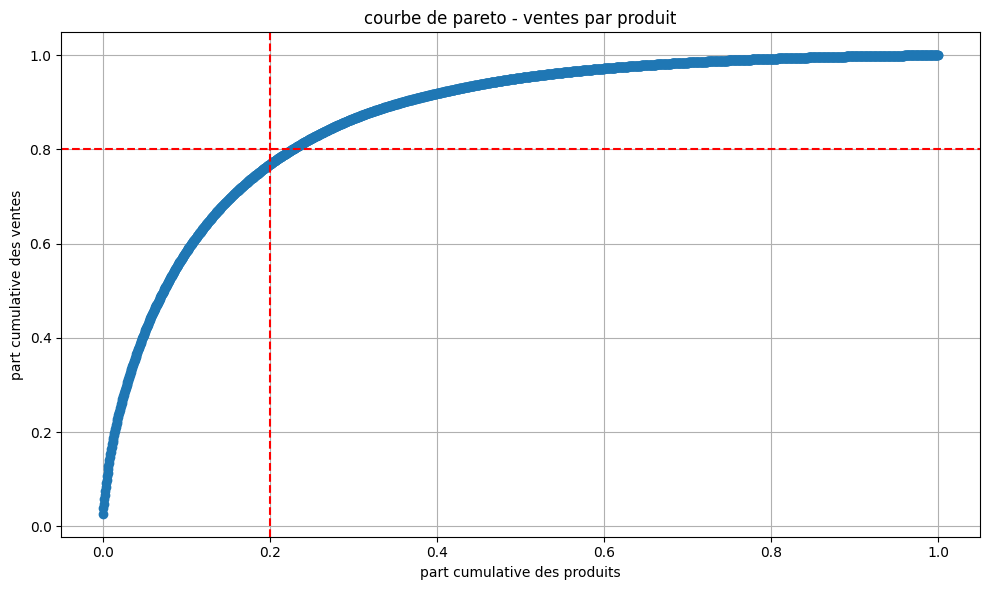

In [39]:
product_sales = df.groupby('Product Name')['Sales'].sum()
product_sales_sorted = product_sales.sort_values(ascending=False)
total_sales = product_sales_sorted.sum()
sales_cumsum = product_sales_sorted.cumsum()
sales_cum_percent = sales_cumsum / total_sales
pareto_products = pd.DataFrame({
    'Sales': product_sales_sorted,
    'Sales Cumulé (%)': sales_cum_percent
})
pareto_products['Produit (%)'] = np.linspace(0, 1, len(pareto_products))
plt.figure(figsize=(10, 6))
plt.plot(pareto_products['Produit (%)'], pareto_products['Sales Cumulé (%)'], marker='o')
plt.axhline(0.8, color='red', linestyle='--')
plt.axvline(0.2, color='red', linestyle='--')
plt.title('courbe de pareto - ventes par produit')
plt.xlabel('part cumulative des produits')
plt.ylabel('part cumulative des ventes')
plt.grid(True)
plt.tight_layout()
plt.show()

Clients :

Pareto verifie. ENfin je crois

Produits :

    Pareto presque vrai, mais plus diffus que les clients.

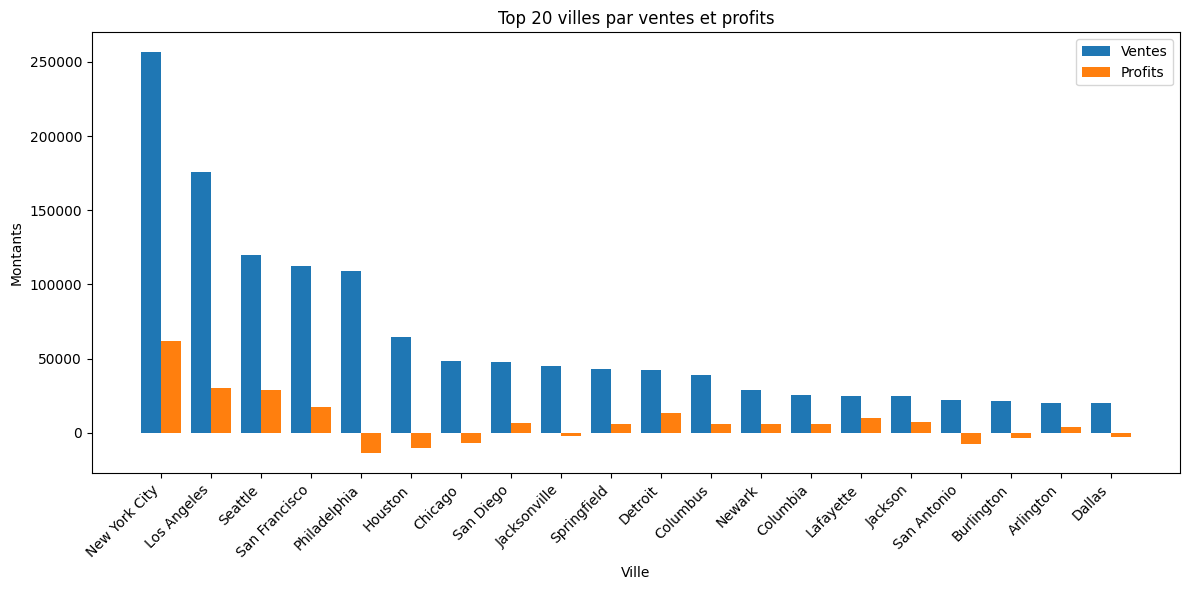

In [40]:
# grouper les donnees par ville et sommer les ventes et profits
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()

# trier par ventes (ou profit) pour selectionner les 20 premiers
top_cities = city_summary.sort_values('Sales', ascending=False).head(20)

# tracer les barres ventes et profits cote a cote
plt.figure(figsize=(12, 6))

# largeur des barres
bar_width = 0.4
x = range(len(top_cities))

# barres des ventes
plt.bar(x, top_cities['Sales'], width=bar_width, label='Ventes')

# barres des profits decalees
plt.bar([i + bar_width for i in x], top_cities['Profit'], width=bar_width, label='Profits')

# etiquettes
plt.xticks([i + bar_width / 2 for i in x], top_cities.index, rotation=45, ha='right')
plt.xlabel('Ville')
plt.ylabel('Montants')
plt.title('Top 20 villes par ventes et profits')
plt.legend()
plt.tight_layout()
plt.show()

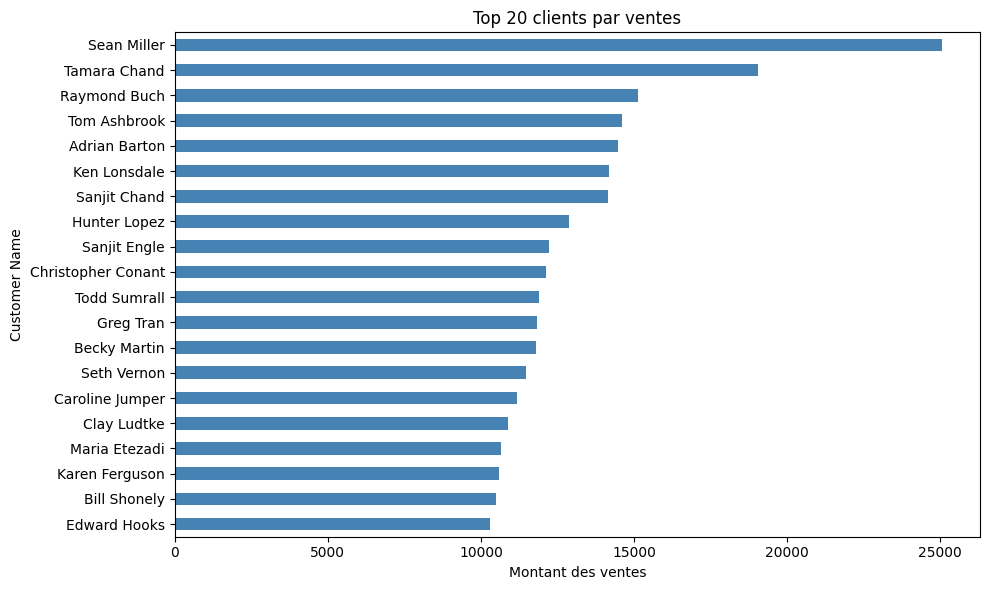

In [ ]:
# grouper par client et sommer les ventes
top_clients = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# tracer un barplot horizontal
plt.figure(figsize=(10, 6))
top_clients.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Montant des ventes')
plt.title('Top 20 clients par ventes')
plt.tight_layout()
plt.show()

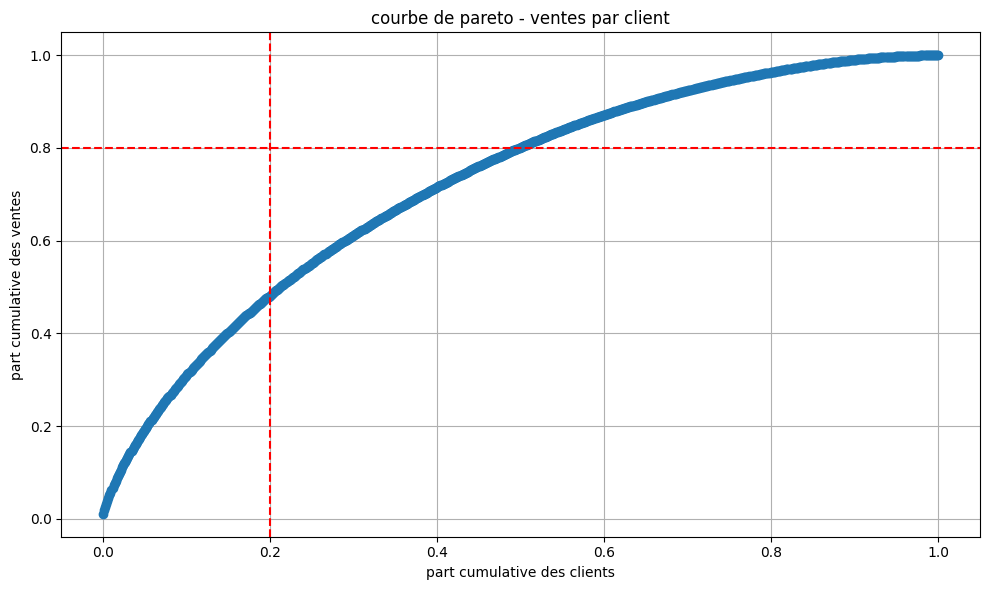

In [43]:

# total des ventes par client
client_sales = df.groupby('Customer Name')['Sales'].sum()

# tri des clients par ventes décroissantes
client_sales_sorted = client_sales.sort_values(ascending=False)

# cumul des ventes et pourcentage cumulé
total_sales = client_sales_sorted.sum()
sales_cumsum = client_sales_sorted.cumsum()
sales_cum_percent = sales_cumsum / total_sales

# construire le DataFrame pour la courbe
pareto_sales_df = pd.DataFrame({
    'Sales': client_sales_sorted,
    'Sales Cumulé (%)': sales_cum_percent
})
pareto_sales_df['Client (%)'] = np.linspace(0, 1, len(pareto_sales_df))

plt.figure(figsize=(10, 6))
plt.plot(pareto_sales_df['Client (%)'], pareto_sales_df['Sales Cumulé (%)'], marker='o')

# lignes rouges pour 80/20
plt.axhline(0.8, color='red', linestyle='--')
plt.axvline(0.2, color='red', linestyle='--')

plt.title('courbe de pareto - ventes par client')
plt.xlabel('part cumulative des clients')
plt.ylabel('part cumulative des ventes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
seuil_pareto_sales = sales_cum_percent[sales_cum_percent <= 0.80]
nb_clients_80_sales = len(seuil_pareto_sales)
part_clients_sales = nb_clients_80_sales / len(client_sales_sorted)

print(f"{nb_clients_80_sales} clients ({part_clients_sales:.2%}) generent 80% des ventes.")

395 clients (49.81%) generent 80% des ventes.


ventes sont plus "égalitaires" entre les clients.

pas de petit groupe de clients qui écrase tout en termes de volume d'achat.

panier moyen est plus homogène.

beaucoup de clients réguliers à volume modéré plutôt qu'une élite à très fort volume.

Synthèse des résultats précédents :

    Rentabilité par État (Profit / Sales)

        Des États comme Ohio, Texas, Tennessee, Colorado présentent des ratios négatifs ou très faibles → ventes déficitaires.

        À l'inverse, District of Columbia, Minnesota, Maine, Georgia affichent une rentabilité élevée, même avec un volume de ventes plus faible.

    Remises moyennes

        Les États non rentables sont souvent ceux où les remises sont les plus élevées → baisse des marges.

    Pareto clients / produits

        ~20 % des produits génèrent ~80 % des ventes.

        ~20 % des clients génèrent plus de 80 % des profits → base fidèle et très rentable à choyer.

(aide par chat gpt )
Recommandations concrètes
Renforcer la présence marketing dans les États rentables :

    District of Columbia

    Minnesota

    Georgia

    Indiana

    Maine
    Ces États génèrent un profit élevé

Réduire ou réévaluer les stratégies commerciales dans :

    Ohio

    Texas

    Colorado

    Tennessee

    Illinois
    → Ces États présentent des pertes

Cibler les clients à forte contribution :

    Mise en place d’un programme VIP/fidélité pour les top 20 % clients.

    Suivi individuel ou offres personnalisées pour ces clients rentables.

Optimiser l’offre produit :

    Focus marketing sur les 20 % de produits générant 80 % des ventes.

    Réduire ou sortir progressivement les produits peu performants (long tail).